In [17]:
import pandas as pd 
import sklearn.metrics as mt 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [6]:
data=pd.read_csv(r"C:\Users\Kemalettin\Desktop\anlasekon\Python ile Makine Öğrenmesi\Real estate valuation data set.csv",index_col = 0)
data2 = data.copy()
data2.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [15]:
# detaylı bir çalışma olmayacak önemli olan polinomial regression nedir nasıl uygulanır
# bunu pekiştirmeye yönelik olacağından yer kaplamaması açısından bu şekilde yapacağız. 
# Öncelikle bu minvalde hareket edeceğimiz için işimize yaramayacak bilgileri silelim
data2.drop(columns=["X1 transaction date","X5 latitude","X6 longitude"],axis=1,inplace=True)
data2.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'Y house price of unit area'],
      dtype='object')

In [16]:
print(data2.isnull().sum())

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
Y house price of unit area                0
dtype: int64


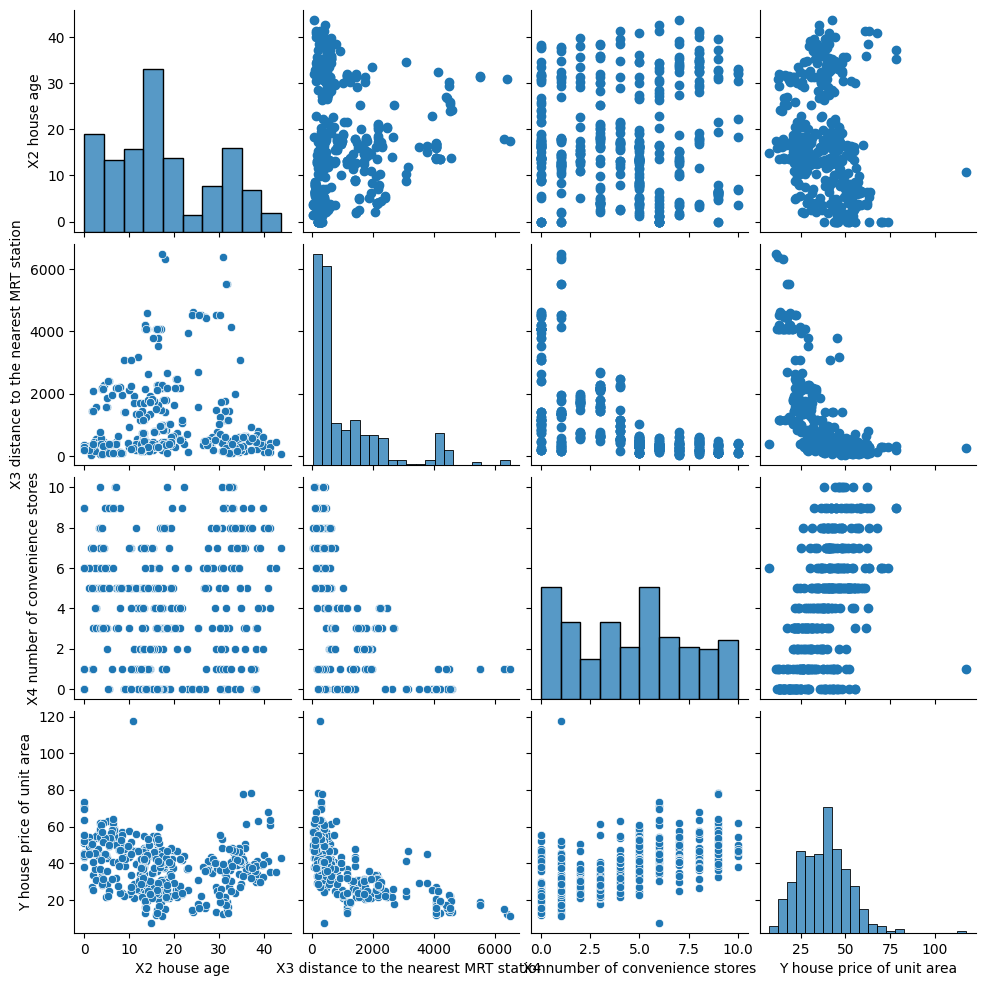

In [18]:
g = sns.pairplot(data2)
g.map_upper(plt.scatter)

In [19]:
y = data2["Y house price of unit area"]
X = data2.drop(columns=["Y house price of unit area"])

In [27]:
poly = PolynomialFeatures(degree=3)
x_Pol = poly.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
pol_reg = LinearRegression()
pol_reg.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = pol_reg.predict(X_test)
r2 = mt.r2_score(y_test,y_pred)
mse = mt.mean_squared_error(y_test,y_pred)
print(f"R2 skoru: {r2}\nMSE skoru: {mse}")

R2 skoru: 0.6489726933106557
MSE skoru: 58.88825128983575
